In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.distributions import norm
import statsmodels.api as sm
import pylab
from scipy.stats import jarque_bera, skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf

1. Statistical Analysis

In [ ]:
# Import Data
url = 'https://raw.githubusercontent.com/hangtran108/Financial-Risk-Management-2/main/price_frisk2.csv'
df = pd.read_csv(url)
df = df[df['symbol'] == 'HPG'][['date', 'close']]
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.head()

,date,close
3750,2021-12-31,46.4
3751,2021-12-30,45.7
3752,2021-12-29,45.8
3753,2021-12-28,45.8
3754,2021-12-27,45.9


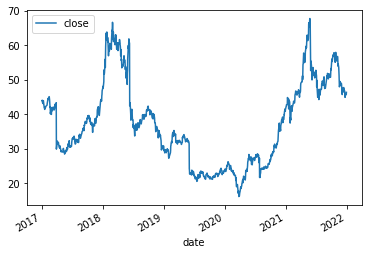

In [ ]:
# Price Chart
df.plot.line(x = 'date', y = 'close')

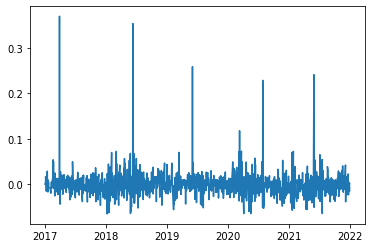

In [ ]:
# Return Chart
price = list(df['close'])
returns = np.log(price[1:]) - np.log(price[:-1])
days = list(df['date'])
fig, ax = plt.subplots()
ax.plot(days[:-1], returns)
plt.show()

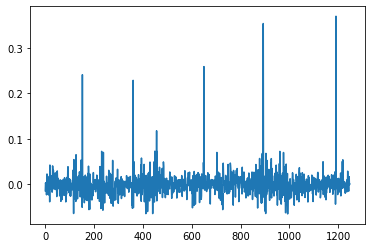

In [ ]:
plt.plot(returns)

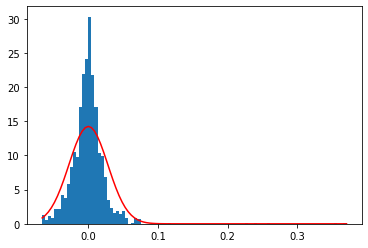

In [ ]:
mean, var = norm.fit(returns)
x = np.linspace(min(returns), max(returns), 100)
y = norm.pdf(x, mean, var)
plt.hist(returns, bins = x.flatten(), density = True)
plt.plot(x, y, 'r-')
plt.show()

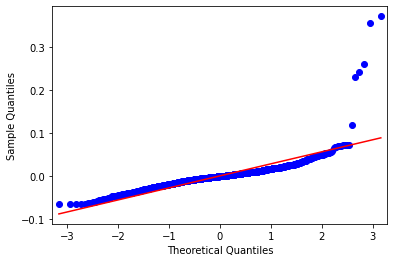

In [ ]:
sm.qqplot(returns, line = 's')
pylab.show()

In [ ]:
jarque_bera(returns)

(178749.67530331423, 0.0)

In [ ]:
print('Skewness:', skew(returns))
print('Excess Kurtosis:', kurtosis(returns))

Skewness: 5.1091371858505035
Excess Kurtosis: 57.732838356498654


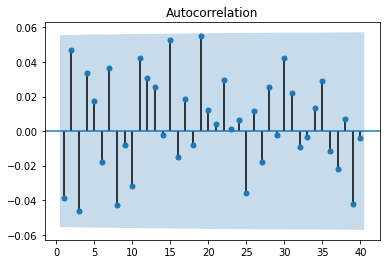

In [ ]:
plot_acf(returns, lags = 40, alpha = 0.05, use_vlines = True, zero = False)
plt.show()

2. Using ARCH  model to estimate Value at Risk of the returns at 5%